<a href="https://colab.research.google.com/github/MatthewFried/Numerical_Methods/blob/main/Kinematics_of_the_Stewart_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kinematics of the Steward Platform

A Stewart platform consists of six struts supporting a payload.  It can be thought of as a six-degree-of-freedom robot.  Our task is to use the 2-dimensional case as outlined in Sauer's book, to solve the calculations needed in finding the positions of the different struts.

We have variables $p1, p2, p3, L1, L2, L3, gamma, x1, x2, y2, $ and $ theta$ that we can use to find (x,y).  Each solution of theta corresponds to an (x,y) which is a new position that the robot can be in.  Our goal is to find the zeros for theta and thus the possible positions.

To do this we use:
```
A2 = L3*cos(theta) - x1
B2 = L3*sin(theta)
A3 = L2*cos(theta + gamma)-x2
B3 = L2*sin(theta+gamma)-y2
```
which we substitute into the below to solve for (x,y)
```
N1 = B3(p2**2-p1**2-A2**2-B2**2)-B2(p3**2-p1**2-A3**2-B3**2)
N2 = -A3(p2**2-p1**2-A2**2-B2**2)+A2(p3**2-p1**2-A3**2-B3**2)
D = 2(A2B3-B2A3)
```
with $$x = \frac{N_1}{D}$$ and $$y=\frac{N_2}{D}$$

The below bisection method code is the same I used in the previous solution set.  I use sympy to solve the relational set up.  The application of the bisection method is slow, but it works in every case.  I create wrapper functions in order to find all solutions.

In sympy, one can substitute values in using *subs*, however, I left it as one long equation to make it easier to track.  The bisection method takes in the function, bounds, and the tolerance, and it checks that there is a solution, then continues to check the median until the tolerance is met.

The *evalf* function from sympy is used to evaluate the function at each step.

In [ ]:
from sympy import *
from sympy.calculus.util import continuous_domain
import matplotlib.pyplot as mpl
import math

def bisection2(f,a,b,tol):
  f_a = f.subs({L1:2, L2:sqrt(2), L3:sqrt(2), gamma:pi/2, p1:sqrt(5),p2:sqrt(5),p3:sqrt(5),x1:4,x2:0,y2:4,theta:a }).evalf()

  f_b = f.subs({L1:2, L2:sqrt(2), L3:sqrt(2), gamma:pi/2, p1:sqrt(5),p2:sqrt(5),p3:sqrt(5),x1:4,x2:0,y2:4,theta:b }).evalf()

  #check that there actually is a zero in the range
  #if not, check for continuity
  if (sign(f_a)*sign(f_b)>= 0):
    return 'NaN'
  
  '''
  else:
    cont = continuous_domain(f, x, Interval(a,b))
    if (isinstance(cont, Union)):
      return 'Not continuous'
  '''

  while ((b-a)/2) > tol:
    c = (a+b)/2
    f_c = f.subs({L1:2, L2:sqrt(2), L3:sqrt(2), gamma:pi/2, p1:sqrt(5),p2:sqrt(5),p3:sqrt(5),x1:4,x2:0,y2:4,theta:c }).evalf()

    if f_c == 0:
      return c
    else:
      if (sign(f_c)*sign(f_a)< 0):
        b = c
        f_b = f_c
      else:
        a = c
        f_a = f_c
  return (a+b)/2

#x = symbols('x')
#func = tan(x)

#print(bisection2(func,1,2,.000005))

### Set up the problem

All variables are created and the substitutions are made, putting everything into f.

In [ ]:
p1, p2, p3, L1, L2, L3, gamma, x1, x2, y2, theta = symbols(' p1 p2 p3 L1 L2 L3 gamma x1 x2 y2 theta')
#A2 = L3*cos(theta) - x1
#B2 = L3*sin(theta)
#A3 = L2*cos(theta + gamma)-x2
#B3 = L2*sin(theta+gamma)-y2

#N1 = (L2*sin(theta+gamma)-y2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-(L3*sin(theta))**2)-(L3*sin(theta))*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-(L2*sin(theta+gamma)-y2)**2)
#N2 = -(L2*cos(theta + gamma)-x2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-((L3*sin(theta))**2))+(L3*cos(theta) - x1)*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-((L2*sin(theta+gamma)-y2)**2))
#D = 2*((L3*cos(theta) - x1)*(L2*sin(theta+gamma)-y2)-(L3*sin(theta))*(L2*cos(theta + gamma)-x2))

f = ((L2*sin(theta+gamma)-y2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-(L3*sin(theta))**2)-(L3*sin(theta))*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-(L2*sin(theta+gamma)-y2)**2))**2+(-(L2*cos(theta + gamma)-x2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-((L3*sin(theta))**2))+(L3*cos(theta) - x1)*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-((L2*sin(theta+gamma)-y2)**2)))**2-(p1**2)*(2*((L3*cos(theta) - x1)*(L2*sin(theta+gamma)-y2)-(L3*sin(theta))*(L2*cos(theta + gamma)-x2)))**2



Below we test that it is able to find a known solution of pi/4 - which it does!

In [ ]:
print(bisection2(f,0,3,.000005))

0.7853994369506836


## Task 1

Here we test that our function is solved for theta of pi/4 and -pi/4.  The solutions of which are zero.

In [ ]:
x = f.subs({L1:2, L2:sqrt(2), L3:sqrt(2), gamma:pi/2, p1:sqrt(5),p2:sqrt(5),p3:sqrt(5),x1:4,x2:0,y2:4,theta:pi/4 }).evalf()
y = f.subs({L1:2, L2:sqrt(2), L3:sqrt(2), gamma:pi/2, p1:sqrt(5),p2:sqrt(5),p3:sqrt(5),x1:4,x2:0,y2:4,theta:-pi/4 }).evalf()
print(x,y)

0 0


## Task 2

Here we draw the chart for the given task, as outlined below in the *x* variable, which uses the *subs* command to fill in the fixed values, leaving *theta* to vary.

In [ ]:
f = ((L2*sin(theta+gamma)-y2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-(L3*sin(theta))**2)-(L3*sin(theta))*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-(L2*sin(theta+gamma)-y2)**2))**2+(-(L2*cos(theta + gamma)-x2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-((L3*sin(theta))**2))+(L3*cos(theta) - x1)*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-((L2*sin(theta+gamma)-y2)**2)))**2-(p1**2)*(2*((L3*cos(theta) - x1)*(L2*sin(theta+gamma)-y2)-(L3*sin(theta))*(L2*cos(theta + gamma)-x2)))**2
x = f.subs({L1:2, L2:sqrt(2), L3:sqrt(2), gamma:pi/2, p1:sqrt(5),p2:sqrt(5),p3:sqrt(5),x1:4,x2:0,y2:4})

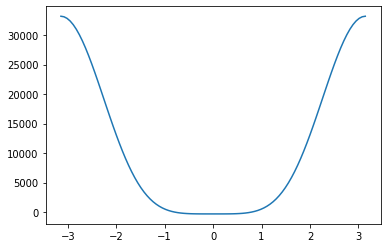

In [ ]:
from sympy import symbols
from numpy import linspace
from sympy import lambdify
import matplotlib.pyplot as mpl
import math

lam_x = lambdify(theta, x, modules=['numpy'])

x_vals = linspace(-math.pi, math.pi, 100)
y_vals = lam_x(x_vals)

mpl.plot(x_vals, y_vals)
mpl.show()

## Task 3

Here I solve for the required zeros using the bisection method as above, after drawing the picture to get a "feel" for where the solutions might exist.

In [ ]:
def bisection3(f,a,b,tol):
  f_a = f.subs({L1:3, L2:3*sqrt(2), L3:3, gamma:pi/4, p1:5,p2:5,p3:3,x1:5,x2:0,y2:6,theta:a }).evalf()

  f_b = f.subs({L1:3, L2:3*sqrt(2), L3:3, gamma:pi/4, p1:5,p2:5,p3:3,x1:5,x2:0,y2:6,theta:b }).evalf()

  #check that there actually is a zero in the range
  #if not, check for continuity
  if (sign(f_a)*sign(f_b)>= 0):
    return 'NaN'
  
  '''
  else:
    cont = continuous_domain(f, x, Interval(a,b))
    if (isinstance(cont, Union)):
      return 'Not continuous'
  '''

  while ((b-a)/2) > tol:
    c = (a+b)/2
    f_c =f.subs({L1:3, L2:3*sqrt(2), L3:3, gamma:pi/4, p1:5,p2:5,p3:3,x1:5,x2:0,y2:6,theta:c }).evalf()

    if f_c == 0:
      return c
    else:
      if (sign(f_c)*sign(f_a)< 0):
        b = c
        f_b = f_c
      else:
        a = c
        f_a = f_c
  return (a+b)/2

#f = ((L2*sin(theta+gamma)-y2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-(L3*sin(theta))**2)-(L3*sin(theta))*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-(L2*sin(theta+gamma)-y2)**2))**2+(-(L2*cos(theta + gamma)-x2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-((L3*sin(theta))**2))+(L3*cos(theta) - x1)*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-((L2*sin(theta+gamma)-y2)**2)))**2-(p1**2)*(2*((L3*cos(theta) - x1)*(L2*sin(theta+gamma)-y2)-(L3*sin(theta))*(L2*cos(theta + gamma)-x2)))**2


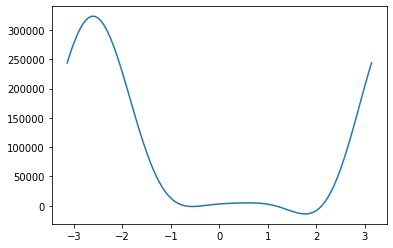

In [ ]:
f = ((L2*sin(theta+gamma)-y2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-(L3*sin(theta))**2)-(L3*sin(theta))*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-(L2*sin(theta+gamma)-y2)**2))**2+(-(L2*cos(theta + gamma)-x2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-((L3*sin(theta))**2))+(L3*cos(theta) - x1)*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-((L2*sin(theta+gamma)-y2)**2)))**2-(p1**2)*(2*((L3*cos(theta) - x1)*(L2*sin(theta+gamma)-y2)-(L3*sin(theta))*(L2*cos(theta + gamma)-x2)))**2
x = f.subs({L1:3, L2:3*sqrt(2), L3:3, gamma:pi/4, p1:5,p2:5,p3:3,x1:5,x2:0,y2:6})

from sympy import symbols
from numpy import linspace
from sympy import lambdify
import matplotlib.pyplot as mpl
import math

lam_x = lambdify(theta, x, modules=['numpy'])

x_vals = linspace(-math.pi, math.pi, 100)
y_vals = lam_x(x_vals)

mpl.plot(x_vals, y_vals)
mpl.show()

###Approach

I plot the function first to see what range I should choose. After I implement the very technical "eyeball approach", I see that it should be sufficient to break my search up into a range of .05.

As such, I created a function that chops the range into intervals and tests for a solution.  If there is a solution then the theta is recorded in the *answers* list, otherwisse it is skipped (as a NaN).


In [ ]:
def zeros_in_intervals(f,a,b,tol,bin_size):
  arr = linspace(a,b,bin_size+1)
  answers = []
  for _ in range(bin_size):
    answers.append(bisection3(f,arr[_],arr[_+1],tol))
    
  sol = [x for x in answers if str(x) != 'NaN']
  return sol

In [ ]:
thetas = zeros_in_intervals(f,-2,2.5,.00005, 10)
print(thetas)

[-0.7208343505859374, -0.33098449707031247, 1.1437103271484372, 2.1158905029296875]


We can see that there are 4 zeros, and thus four positions for x,y which are solved for below.

In [ ]:
N1 = (L2*sin(theta+gamma)-y2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-(L3*sin(theta))**2)-(L3*sin(theta))*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-(L2*sin(theta+gamma)-y2)**2)
N2 = -(L2*cos(theta + gamma)-x2)*((p2**2)-(p1**2)-((L3*cos(theta) - x1)**2)-((L3*sin(theta))**2))+(L3*cos(theta) - x1)*((p3**2)-(p1**2)-((L2*cos(theta + gamma)-x2)**2)-((L2*sin(theta+gamma)-y2)**2))
D = 2*((L3*cos(theta) - x1)*(L2*sin(theta+gamma)-y2)-(L3*sin(theta))*(L2*cos(theta + gamma)-x2))

N1_list = []
N2_list = []
D_list = []
for k in thetas:
  N1_list.append(N1.subs({L1:3, L2:3*sqrt(2), L3:3, gamma:pi/4, p1:5,p2:5,p3:3,x1:5,x2:0,y2:6,theta:k}).evalf())
  N2_list.append(N2.subs({L1:3, L2:3*sqrt(2), L3:3, gamma:pi/4, p1:5,p2:5,p3:3,x1:5,x2:0,y2:6,theta:k}).evalf())
  D_list.append(D.subs({L1:3, L2:3*sqrt(2), L3:3, gamma:pi/4, p1:5,p2:5,p3:3,x1:5,x2:0,y2:6,theta:k}).evalf())

for i in range(len(thetas)):
  print('X -', N1_list[i]/D_list[i], '\tY -', N2_list[i]/D_list[i])

X - -1.37838026658637 	Y - 4.80624057436060
X - -0.914649565254706 	Y - 4.91566112219290
X - 4.48169737665730 	Y - 2.21662512802571
X - 4.57182164379588 	Y - 2.02440624804186


###Summary

The exercise was a very intersting application of using numerical methods to solve a formula that does not have an easier closed form approach.  It was very interesting to apply my knowledge and learn about sympy in the process.